In [2]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Open the pickle file
reg_data = pickle.load(open('../data/processed/stock_data.pkl', 'rb'))
reg_data

%Chg                                                  \
ticker                AAL  ALGT   ALK   DAL   ITA   IYT  JBLU  JETS   LUV   
Time                                                                        
2022-05-05 09:30:00 -1.38  2.10 -1.66 -1.19 -0.70 -0.96 -1.75 -0.97 -0.85   
2022-05-05 09:45:00 -0.67 -0.92 -0.21 -0.20 -0.29 -0.09 -0.09 -0.35 -0.15   
2022-05-05 10:00:00 -0.31 -0.25 -0.29 -0.15 -0.65 -0.36 -0.36 -0.26  0.04   
2022-05-05 10:15:00 -0.47 -0.36 -0.57 -0.60 -0.08 -0.42 -0.62 -0.56 -0.49   
2022-05-05 10:30:00  0.16 -0.29 -0.29 -0.16 -0.08 -0.14  0.00  0.00 -0.14   
...                   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2025-05-30 14:45:00  0.22  0.13  0.09  0.02  0.10  0.12  0.39  0.09  0.12   
2025-05-30 15:00:00  0.09 -0.03 -0.09  0.21  0.11  0.02 -0.39  0.07  0.21   
2025-05-30 15:15:00  0.26  0.21  0.24  0.35  0.22  0.18  0.29  0.22  0.21   
2025-05-30 15:30:00 -0.13 -0.11 -0.31 -0.24 -0.11 -0.14 -0.49 -0.09 -0.15   
2025-05-30 15:45:00 -0.35 -0.73 -0.66 -0.32  0.01  0.00 -0.98  0.00 -0.40   

                           ...     Volume                                 \
ticker                UAL  ...        AAL      ALGT       ALK        DAL   
Time                       ...                                             
2022-05-05 09:30:00 -1.06  ...  3473869.0    5716.0   42947.0   708424.0   
2022-05-05 09:45:00 -0.64  ...  1107422.0    3718.0   22347.0   331864.0   
2022-05-05 10:00:00 -0.33  ...   881282.0    4430.0   45955.0   351036.0   
2022-05-05 10:15:00 -0.68  ...  1280844.0    3193.0   32508.0   420730.0   
2022-05-05 10:30:00  0.01  ...  1389956.0    1130.0   37288.0   394549.0   
...                   ...  ...        ...       ...       ...        ...   
2025-05-30 14:45:00  0.29  ...  1445222.0    6516.0   27711.0   261687.0   
2025-05-30 15:00:00  0.05  ...  1866339.0    5159.0   43059.0   206491.0   
2025-05-30 15:15:00  0.49  ...  1436577.0   11567.0   70278.0   394754.0   
2025-05-30 15:30:00 -0.19  ...  1747817.0   11718.0  131805.0   247533.0   
2025-05-30 15:45:00 -0.39  ...  7894033.0  110917.0  440444.0  1245698.0   

                                                                        \
ticker                   ITA      IYT       JBLU       JETS        LUV   
Time                                                                     
2022-05-05 09:30:00  26597.0  16652.0   541495.0  1037563.0   229638.0   
2022-05-05 09:45:00   9032.0   7200.0   227801.0   294311.0    72237.0   
2022-05-05 10:00:00   9982.0  23148.0   266955.0   233068.0   241276.0   
2022-05-05 10:15:00  10480.0  12800.0   279409.0   100068.0   154437.0   
2022-05-05 10:30:00  12918.0  24640.0   382768.0   170155.0    81960.0   
...                      ...      ...        ...        ...        ...   
2025-05-30 14:45:00   9343.0    738.0   791081.0    19757.0   171924.0   
2025-05-30 15:00:00   9035.0   3369.0   763213.0    30811.0   228804.0   
2025-05-30 15:15:00  12738.0   3297.0  1133607.0    64582.0   281941.0   
2025-05-30 15:30:00  40679.0  12343.0   985589.0    80263.0   480198.0   
2025-05-30 15:45:00  74404.0  22246.0  8400782.0  3476041.0  2026886.0   

                                
ticker                     UAL  
Time                            
2022-05-05 09:30:00   931819.0  
2022-05-05 09:45:00   484120.0  
2022-05-05 10:00:00   514940.0  
2022-05-05 10:15:00   490295.0  
2022-05-05 10:30:00   539214.0  
...                        ...  
2025-05-30 14:45:00   144655.0  
2025-05-30 15:00:00   169821.0  
2025-05-30 15:15:00   402686.0  
2025-05-30 15:30:00   232344.0  
2025-05-30 15:45:00  1984417.0  

[19954 rows x 530 columns]

In [4]:
# For each column, replace NaN with previous value
for col in reg_data.columns:
    reg_data[col] = reg_data[col].fillna(method='ffill')

In [5]:
tickers = [
'AAL',
'ALGT',
'ALK',
'DAL',
'JBLU',
'LUV',
'UAL'
]

In [6]:
# Calculate MAPE for each lag and ticker
for t in tickers:
    for i in range(1, 13):
        reg_data[f'{t}_MAPE_Naive_{i}'] = 100 * abs(reg_data[('Last', f'{t}')] - reg_data[(f'Last_Lag{i}', f'{t}')])      / reg_data[('Last', f'{t}')]
        reg_data[f'{t}_MAPE_MA4_{i}']   = 100 * abs(reg_data[('Last', f'{t}')] - reg_data[(f'MA4_Last_Lag{i}', f'{t}')])  / reg_data[('Last', f'{t}')]
        reg_data[f'{t}_MAPE_MA12_{i}']  = 100 * abs(reg_data[('Last', f'{t}')] - reg_data[(f'MA12_Last_Lag{i}', f'{t}')]) / reg_data[('Last', f'{t}')]

In [7]:
reg_data

%Chg                                                  \
ticker                AAL  ALGT   ALK   DAL   ITA   IYT  JBLU  JETS   LUV   
Time                                                                        
2022-05-05 09:30:00 -1.38  2.10 -1.66 -1.19 -0.70 -0.96 -1.75 -0.97 -0.85   
2022-05-05 09:45:00 -0.67 -0.92 -0.21 -0.20 -0.29 -0.09 -0.09 -0.35 -0.15   
2022-05-05 10:00:00 -0.31 -0.25 -0.29 -0.15 -0.65 -0.36 -0.36 -0.26  0.04   
2022-05-05 10:15:00 -0.47 -0.36 -0.57 -0.60 -0.08 -0.42 -0.62 -0.56 -0.49   
2022-05-05 10:30:00  0.16 -0.29 -0.29 -0.16 -0.08 -0.14  0.00  0.00 -0.14   
...                   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2025-05-30 14:45:00  0.22  0.13  0.09  0.02  0.10  0.12  0.39  0.09  0.12   
2025-05-30 15:00:00  0.09 -0.03 -0.09  0.21  0.11  0.02 -0.39  0.07  0.21   
2025-05-30 15:15:00  0.26  0.21  0.24  0.35  0.22  0.18  0.29  0.22  0.21   
2025-05-30 15:30:00 -0.13 -0.11 -0.31 -0.24 -0.11 -0.14 -0.49 -0.09 -0.15   
2025-05-30 15:45:00 -0.35 -0.73 -0.66 -0.32  0.01  0.00 -0.98  0.00 -0.40   

                           ... UAL_MAPE_MA12_9 UAL_MAPE_Naive_10  \
ticker                UAL  ...                                     
Time                       ...                                     
2022-05-05 09:30:00 -1.06  ...        1.505891          1.840312   
2022-05-05 09:45:00 -0.64  ...        0.922302          1.009408   
2022-05-05 10:00:00 -0.33  ...        0.565667          0.452311   
2022-05-05 10:15:00 -0.68  ...        0.172917          0.780105   
2022-05-05 10:30:00  0.01  ...        0.295321          0.633538   
...                   ...  ...             ...               ...   
2025-05-30 14:45:00  0.29  ...        2.278351          1.975340   
2025-05-30 15:00:00  0.05  ...        2.291876          2.238431   
2025-05-30 15:15:00  0.49  ...        2.669670          2.703041   
2025-05-30 15:30:00 -0.19  ...        2.363340          1.429288   
2025-05-30 15:45:00 -0.39  ...        1.837749          1.000692   

                    UAL_MAPE_MA4_10 UAL_MAPE_MA12_10 UAL_MAPE_Naive_11  \
ticker                                                                   
Time                                                                     
2022-05-05 09:30:00        1.665044         1.375252          1.733204   
2022-05-05 09:45:00        1.080459         0.868826          1.205410   
2022-05-05 10:00:00        0.693215         0.591069          0.678466   
2022-05-05 10:15:00        0.200966         0.111587          0.225716   
2022-05-05 10:30:00        0.403385         0.164984          0.772124   
...                             ...              ...               ...   
2025-05-30 14:45:00        1.964331         2.279399          1.585304   
2025-05-30 15:00:00        2.013644         2.327507          2.024648   
2025-05-30 15:15:00        2.509073         2.768740          2.715555   
2025-05-30 15:30:00        2.200351         2.486627          2.520060   
2025-05-30 15:45:00        1.579709         1.976210          1.038454   

                    UAL_MAPE_MA4_11 UAL_MAPE_MA12_11 UAL_MAPE_Naive_12  \
ticker                                                                   
Time                                                                     
2022-05-05 09:30:00        1.570107         1.228384          1.645570   
2022-05-05 09:45:00        1.029008         0.737342          1.097609   
2022-05-05 10:00:00        0.749754         0.537414          0.875123   
2022-05-05 10:15:00        0.016830         0.086013          0.001980   
2022-05-05 10:30:00        0.193031         0.103659          0.217779   
...                             ...              ...               ...   
2025-05-30 14:45:00        1.980058         2.210200          2.107448   
2025-05-30 15:00:00        2.013644         2.328555          1.634809   
2025-05-30 15:15:00        2.491866         2.804196          2.502816   
2025-05-30 15:30:00        2.325727         2.585883          2.

In [8]:
mapes = reg_data.mean().filter(like='MAPE').to_frame()
mapes['var'] = mapes.index.get_level_values(0)
mapes['ticker'] = mapes['var'].str.split('_').str[0]
mapes['lag'] = mapes['var'].str.split('_').str[3].astype(int)
mapes['type'] = mapes['var'].str.split('_').str[2]
mapes['MAPE'] = mapes[0]
mapes.reset_index(drop=True, inplace=True)
mapes = mapes.pivot_table(index=['ticker', 'lag'], columns='type', values='MAPE').reset_index().rename_axis(None, axis=1)
mapes

,ticker,lag,MA12,MA4,Naive
0,AAL,1,0.785469,0.474302,0.326998
1,AAL,2,0.874175,0.597681,0.483309
2,AAL,3,0.956843,0.702659,0.604537
3,AAL,4,1.034738,0.797934,0.710913
4,AAL,5,1.108994,0.884473,0.804752
...,...,...,...,...,...
79,UAL,8,1.347666,1.149547,1.078849
80,UAL,9,1.413851,1.222451,1.156576
81,UAL,10,1.478116,1.292613,1.229541
82,UAL,11,1.540301,1.360786,1.300778


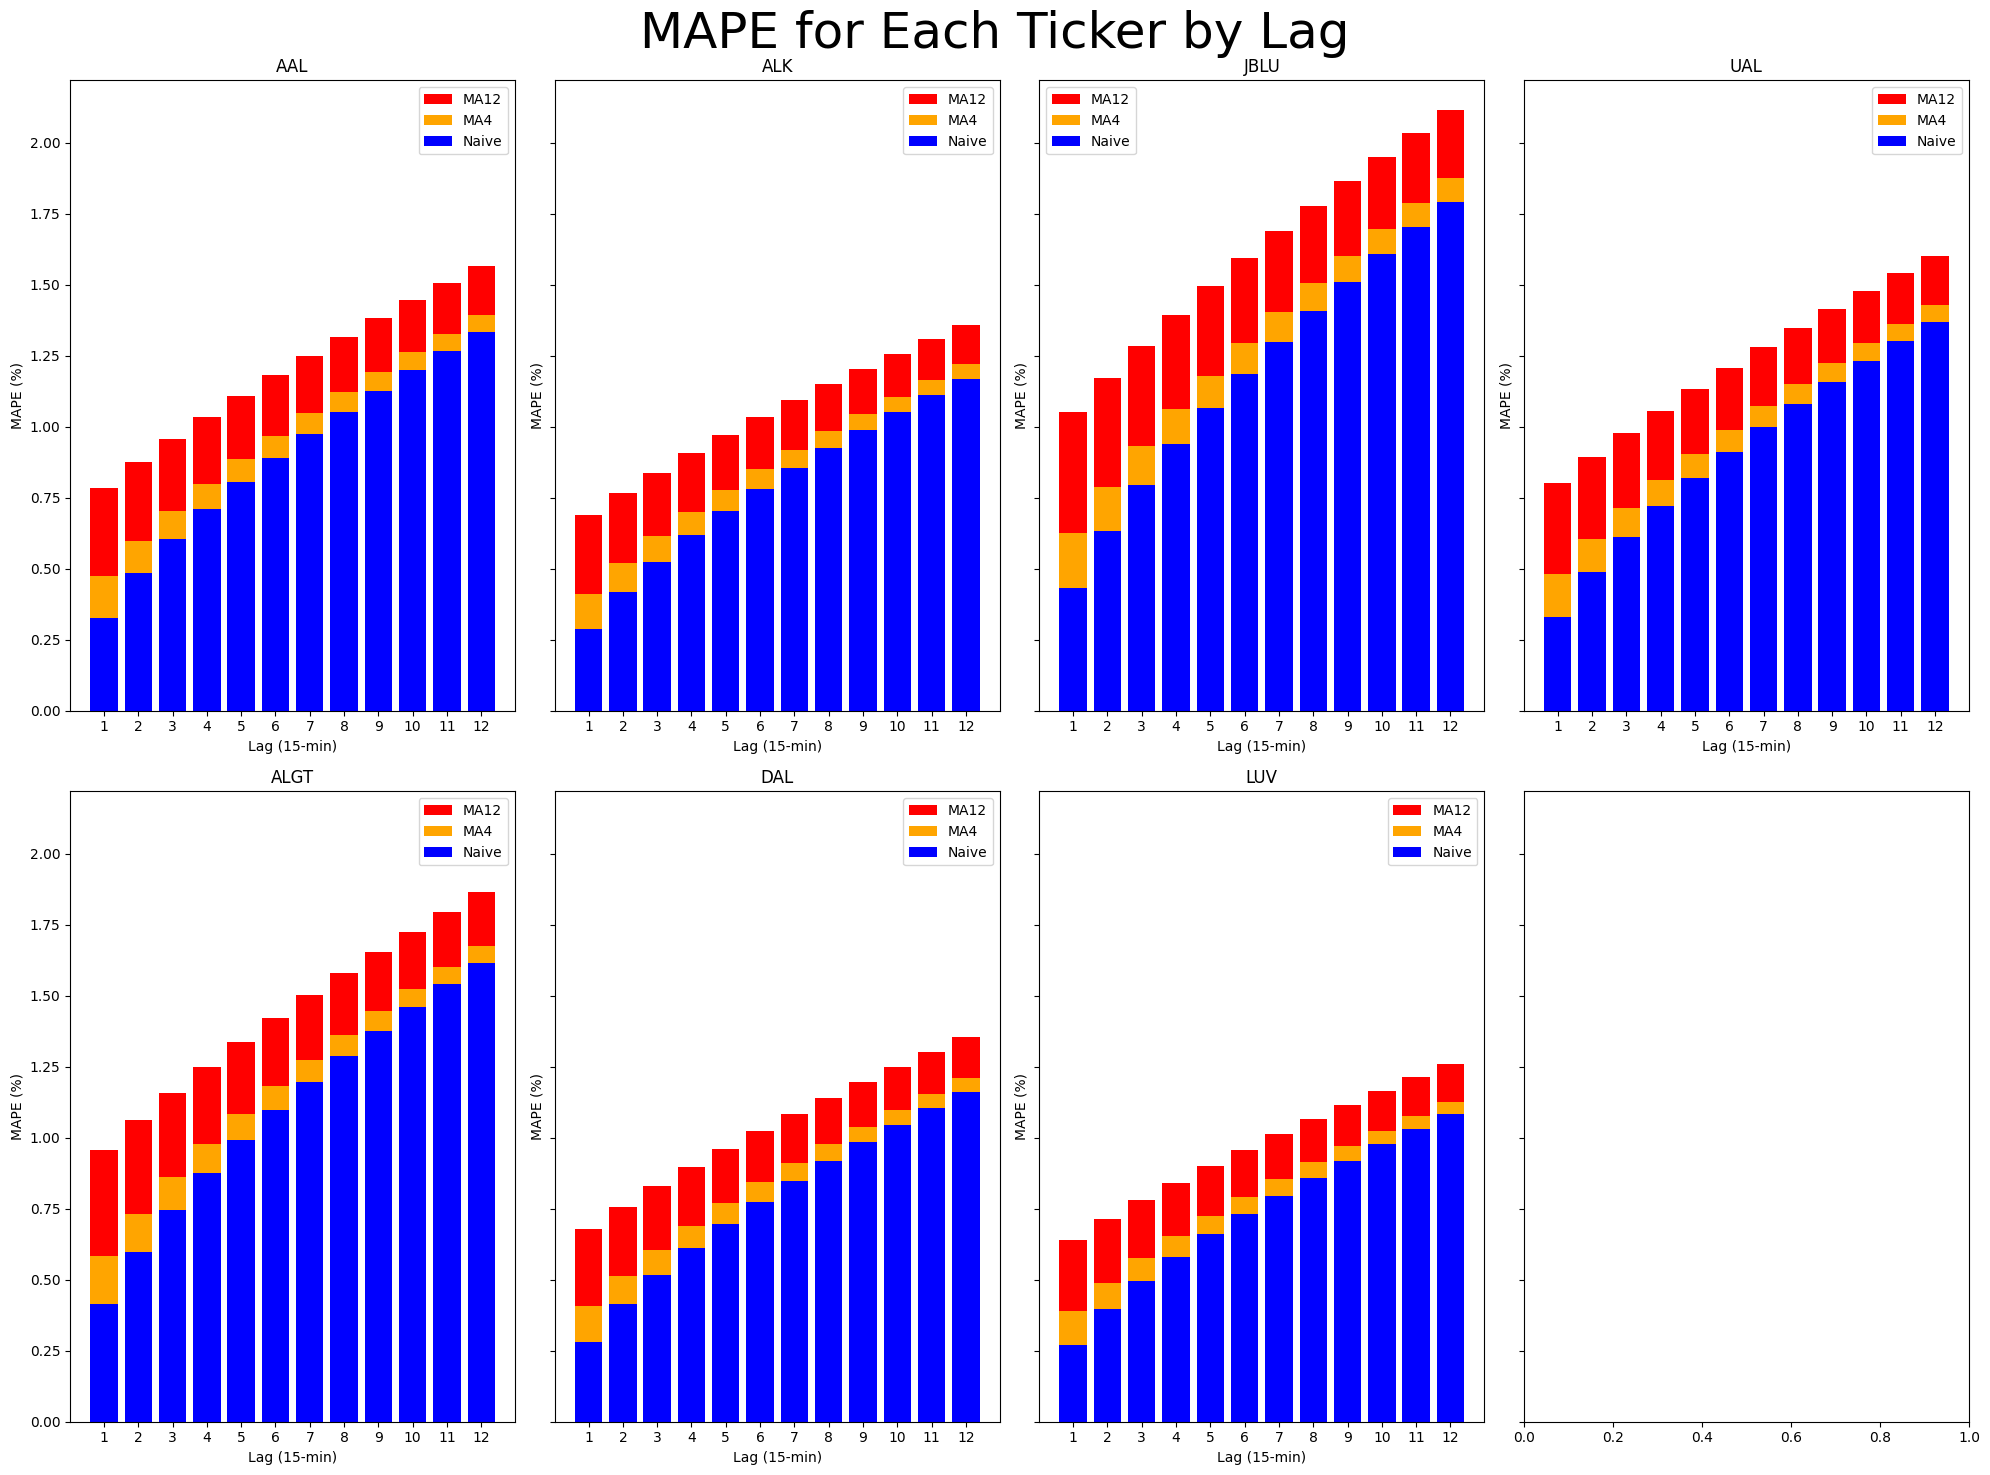

In [9]:
# For each ticker, create a bar chart of MAPE for each lag, then combine them into a single plot
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 15), sharey=True)
fig.suptitle('MAPE for Each Ticker by Lag', fontsize=36)
for i, ticker in enumerate(tickers):
    ax = axes[i % 2, i // 2]
    ticker_data = mapes[mapes['ticker'] == ticker]
    ax.bar(ticker_data['lag'], ticker_data['MA12'], color='red', label='MA12')
    ax.bar(ticker_data['lag'], ticker_data['MA4'], color='orange', label='MA4')
    ax.bar(ticker_data['lag'], ticker_data['Naive'], color='blue', label='Naive')
    ax.set_title(f'{ticker}')
    ax.set_xlabel('Lag (15-min)')
    ax.set_ylabel('MAPE (%)')
    ax.set_xticks(ticker_data['lag'])
    ax.set_xticklabels(ticker_data['lag'])
    ax.legend()
plt.tight_layout()
plt.show()

In [13]:
# Export the results
reg_data_to_export = reg_data.copy()
reg_data_to_export = reg_data_to_export.filter(like='MAPE_Naive')

with open('../data/processed/naive_mape.pkl', 'wb') as f:
    pickle.dump(reg_data_to_export, f)